<a href="https://colab.research.google.com/github/ZachGendreau/Ecommerce_Losss_Prevention/blob/main/LP_MFA_Bullion_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("Jewelery_EDA_v2.csv")

In [37]:
df.columns, df.shape, df.head(1)

(Index(['RecordID', 'ORDER_DATE', 'HOUR', 'ORDER_NUMBER', 'ORDER_TYPE',
        'ORDER_STATUS', 'WHS', 'DEPT', 'CAT', 'ITEM_NUMBER', 'ITEM_DESC',
        'ITEM_PRICE', 'ORDERED_QTY', 'CANCELLED_QTY', 'NAME', 'Length',
        'SOURCESHIPCODE', 'ITEM_CT', 'REASON_CODE', 'HOLD_AUDIT', 'EXCLUDE',
        'HA_DATE', 'HA_DATE/TIME', 'MAX_TIME', 'Max_MAX_TIME', 'CDDEPT',
        'Dept Desc', 'Cat Code', 'CAT I Desc', 'CAT II Desc', 'CAT III Desc'],
       dtype='object'),
 (26478, 31),
    RecordID  ORDER_DATE  HOUR  ORDER_NUMBER  ORDER_TYPE ORDER_STATUS  WHS  \
 0        21  2025-05-29     5    1197673228           1      Ordered  847   
 
    DEPT  CAT  ITEM_NUMBER  ...              HA_DATE         HA_DATE/TIME  \
 0    35  LLL      1943074  ...  2025-05-29 05:21:11  2025-05-29 05:21:11   
 
    MAX_TIME  Max_MAX_TIME CDDEPT  Dept Desc Cat Code            CAT I Desc  \
 0      5.21           NaN     35    JEWELRY      LLL  SAP Auto Adjustments   
 
   CAT II Desc  CAT III Desc  
 0   STROL

In [47]:
df2 = df[['RecordID', 'ORDER_DATE', 'HOUR', 'ORDER_NUMBER',
        'ORDER_STATUS', 'WHS', 'DEPT', 'CAT', 'ITEM_NUMBER', 'ITEM_DESC',
        'ITEM_PRICE', 'ORDERED_QTY', 'CANCELLED_QTY', 'NAME', 'Length',
        'SOURCESHIPCODE', 'ITEM_CT', 'REASON_CODE', 'HOLD_AUDIT',
        'HA_DATE', 'HA_DATE/TIME', 'MAX_TIME', 'Max_MAX_TIME', 'CDDEPT',
        'Dept Desc']]

In [57]:
df2.tail(3)

,RecordID,ORDER_DATE,HOUR,ORDER_NUMBER,ORDER_STATUS,WHS,DEPT,CAT,ITEM_NUMBER,ITEM_DESC,...,SOURCESHIPCODE,ITEM_CT,REASON_CODE,HOLD_AUDIT,HA_DATE,HA_DATE/TIME,MAX_TIME,Max_MAX_TIME,CDDEPT,Dept Desc
26475,1,2025-06-18,8,1204683437,Ordered,847,35,LLL,1943308,315400 PAMP 1OZ GOLD BAR,...,F2N,1,NaN,NaN,2025-06-18 08:55:09,2025-06-18 08:55:09,8.55,NaN,35,JEWELRY
26476,1,2025-06-18,8,1204684269,Ordered,847,35,LLL,1943308,315400 PAMP 1OZ GOLD BAR,...,F2N,1,NaN,NaN,2025-06-18 08:56:13,2025-06-18 08:56:13,8.56,NaN,35,JEWELRY
26477,1,2025-06-18,8,1204684398,Ordered,847,35,LLL,1913480,GUSAE25CARD AMERICAN,...,F2N,1,NaN,NaN,2025-06-18 08:56:25,2025-06-18 08:56:25,8.56,NaN,35,JEWELRY


In [61]:
df2['WHS'].value_counts()

,count
WHS,
847,23245
894,3233


In [63]:
df2['ORDER_STATUS'].value_counts()

,count
ORDER_STATUS,
Ordered,24745
Cancelled,1722
Declined,11


#Orders

## Orders (Past 21)

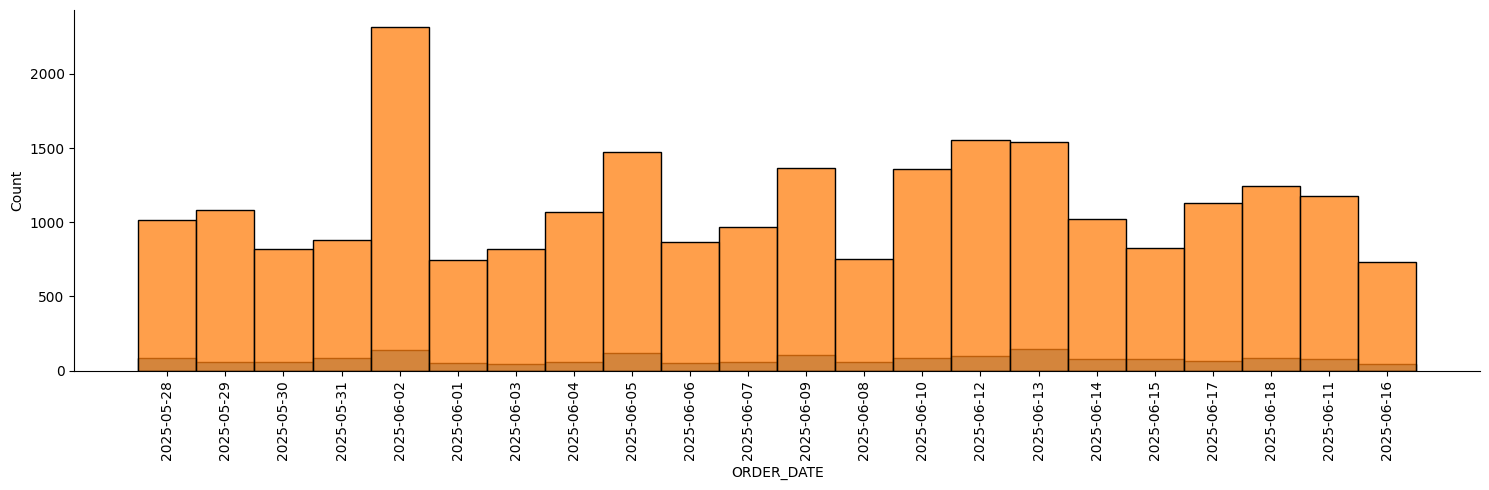

In [79]:
df_ordered = df2[df2['ORDER_STATUS'] == 'Ordered']
df_cancelled = df2[df2['ORDER_STATUS'] == 'Cancelled']

plt.figure(figsize=(15, 5))
sns.histplot(data=df_cancelled, x='ORDER_DATE')
sns.histplot(data=df_ordered, x='ORDER_DATE')
sns.despine()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Sales (Past 21)

/tmp/ipython-input-77-2362313277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['ORDER_DATE'] = pd.to_datetime(df_sales['ORDER_DATE'])
/tmp/ipython-input-77-2362313277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['SALES'] = df_sales['ITEM_PRICE'] * df_sales['ORDERED_QTY']


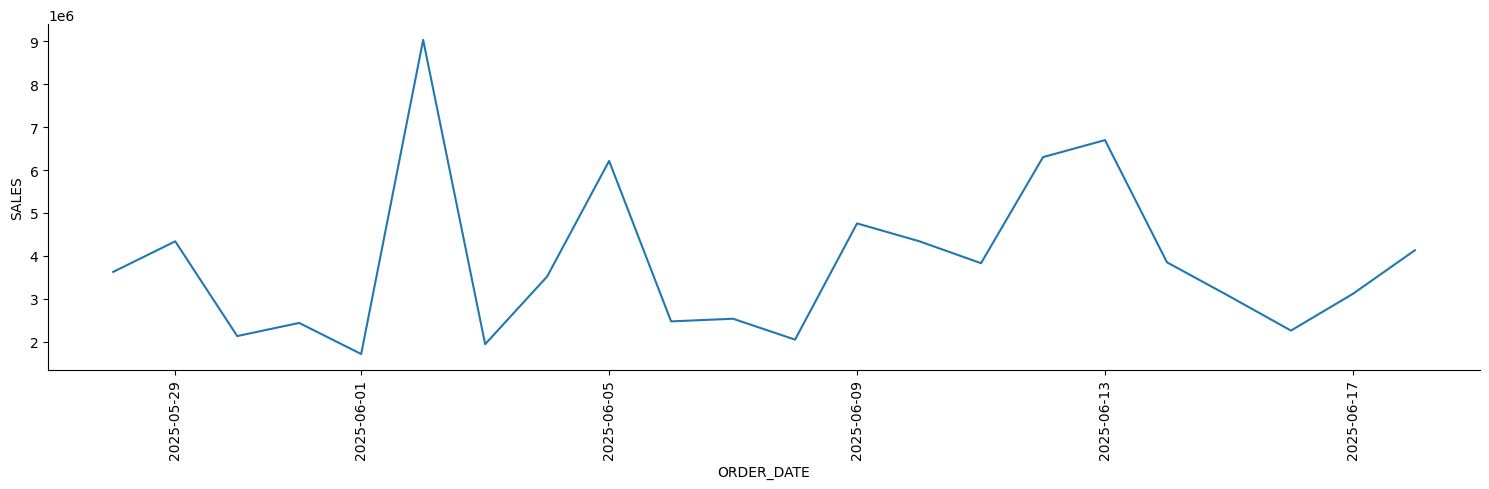

In [77]:

df_sales = df2[df2['ORDER_STATUS'] == 'Ordered']
df_sales['ORDER_DATE'] = pd.to_datetime(df_sales['ORDER_DATE'])
df_sales['SALES'] = df_sales['ITEM_PRICE'] * df_sales['ORDERED_QTY']

daily_sales = df_sales.groupby('ORDER_DATE')['SALES'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(data=daily_sales, x='ORDER_DATE', y='SALES')
sns.despine()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Units (Past 21)

#Cancels